# [AIFFEL_Exploration_11] Rock, Paper, Scissors

## 프로젝트 내용
직접 촬영한 가위바위보 사진들과 딥러닝 네트워크를 쌓아 가위바위보 분류기 만들기

## 목차
*1. 가위바위보 분류기 만들기*   
2. 결론            
3. 회고     
4. References    

## 글씨 색 표시
### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

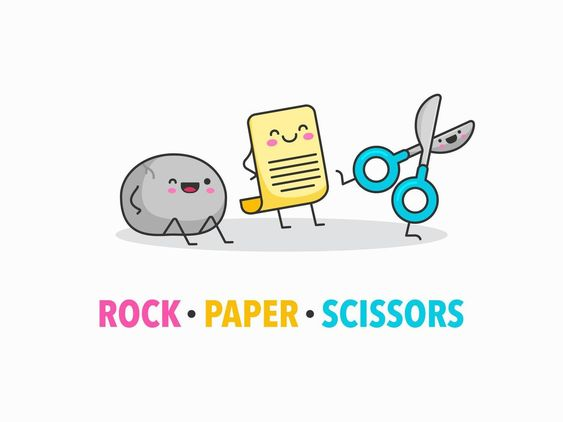

In [92]:
Image("[E-11] images/01.jpg")

# 1. 가위바위보 분류기 만들기 
**- Step 1. 필요한 라이브러리 불러오기**    
**- Step 2. 데이터 준비하기**  
2-1. 데이터 만들기(teachablemachine 웹사이트 활용, 가위바위보 각 100장씩 촬영)    
2-2. 디렉토리 만들기    
2-3. 이미지 업로드     
2-4. 클라우드 이미지 압축 해제    
**- Step 3. 데이터 전처리**    
3-1. 데이터 resize 하기    
3-2. load_data로 데이터 불러오기     
3-3. 잘 불러와졌는지 예시 이미지 데이터 시각화하기     
**- Step 4. 딥러닝 네트워크 설계, 컴파일, 훈련시키기(1번째 시도)**    
**- Step 5. 모델의 성능 평가하기**    
5-1. test data resize, 데이터 불러오기   
5-2. model.evaluate()로 성능 평가, test accuracy 측정      
**- Step 6. model.predict()으로 잘못 추론한 데이터들 확인**      
**- Step 7. 1번째 시도 결론**    
**- Step 8. 정확도를 올리기 위해서, 더 좋은 네트워크를 만들기 위해서 할 수 있는 것!**    
**- Step 9. 2번째 시도_훈련 데이터의 양을 늘리기**    
**- Step 10. 2번째 시도 결론**     
**- Step 11. 3번째 시도_검증데이터 분리**    
**- Step 12. 3번째 시도 결론**    
**- Step 13. 4번째 시도_하이퍼파라미터 조절**    
**- Step 14. 4번째 시도 결론**    

### Step 1. 필요한 라이브러리 불러오기

In [71]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# tensorflow와 numpy 버전 확인
print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [91]:
!pip install IPython # 주피터에 이미지를 넣기 위해 패키지 설치 
from IPython.display import Image

In [28]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### Step 2. 데이터 준비하기
2-1. 데이터 만들기(teachablemachine 웹사이트 활용, 가위바위보 각 100장씩 촬영)    
2-2. 디렉토리 만들기    
2-3. 이미지 업로드     
2-4. 클라우드 이미지 압축 해제

### Step 2-2. 디렉토리 만들기
클라우드에 실습용 디렉토리 rock_scissor_paper 및 하위 디렉토리들을 만들어, 데이터셋 업로드하기

### **<span style = "color:red;">노드 인용_디렉토리 만들 때의 명령어</span>**

In [ ]:
# $ mkdir -p ~/aiffel/rock_scissor_paper/scissor                  
# $ mkdir -p ~/aiffel/rock_scissor_paper/rock         
# $ mkdir -p ~/aiffel/rock_scissor_paper/paper       
 
# $ ls -l ~/aiffel/rock_scissor_paper    

### **<span style = "color:red;">노드 인용_리눅스에서의 mkdir -p 명령어의 의미</span>**

**mkdir -p**   
mkdir를 사용하여 하위 디렉토리를 생성할때 차례대로 만들지 않고, 중간 디렉토리 없이 바로 그 다음 하위 디렉토리를 만들게 되면     
**"디렉토리를 생성할 수 없습니다."** 라는 메시지가 나온다고 한다.    
이 때 -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게 된다.

### Step 2-3. 이미지 업로드
1. Cloud Jupyter를 열기
2. rock_scissor_paper/rock 디렉토리로 이동 후, rock.zip을 upload하기
3. 가위, 보 데이터도 같은 방법으로 업로드

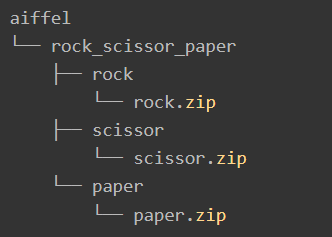

In [93]:
# 노드 인용
Image("[E-11] images/02.PNG")

### Step 2-4. 클라우드 이미지 압축 해제
Cloud Shell 열고 아래 명령어 입력하기

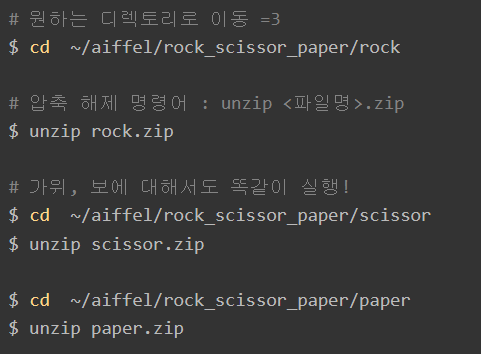

In [8]:
# 노드 인용
Image("[E-11] images/03.PNG")

### Step 3. 데이터 전처리

3-1. 데이터 resize 하기    
3-2. load_data로 데이터 불러오기     
3-3. 데이터가 잘 불러와졌는지 예시 이미지 데이터 시각화하기    

가위바위보 이미지도 숫자 mnist 데이터처럼 28x28 사이즈로 만들어준다.    
이를 위해 PIL 라이브러리 사용(Step 1에서 불러옴)

### **<span style = "color:orange;">PIL 라이브러리가 뭐에요?</span>**

Python Imaging Library(PIL)은 파이썬 인터프리터에 다양한 이미지 파일 형식을 지원하고     
강력한 이미지 처리와 그래픽 기능을 제공하는 자유-오픈 소스 소프트웨어 라이브러리이다.     
줄여서 PIL이라고 부른다.    
[출처: https://ko.wikipedia.org/wiki/Python_Imaging_Library]

### Step 3-1. 데이터 resize하기
노드에서 만들어 준 resize_images() 함수

In [30]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

565  images to be resized.
565  images resized.
가위 이미지 resize 완료!
565  images to be resized.
565  images resized.
바위 이미지 resize 완료!
565  images to be resized.
565  images resized.
보 이미지 resize 완료!


### **<span style = "color:red;">현재 x_train data의 개수 : 가위, 바위, 보 각각 565장씩</span>**

### **<span style = "color:orange;">images=glob.glob에서 glob가 뭐에요?</span>**

PIL에서 glob()는 glob라는 모듈의 일부이다.    
glob 모듈은 와일드카드를 활용하는 특정한 패턴과 일치하는 파일 이름이나 경로를 검색/회수하는 방법을 제공한다.    
그래서 glob를 사용하면, 한 디렉토리에 있는 많은 이미지 파일들을 따로 리스트화하지 않고 처리할 수 있다.    
[출처: ChatGPT]

#### **<span style = "color:red;">아하!</span>**     
특정 파일 이름 패턴을 가진 파일들을 불러오고 싶을 때 glob 모듈의 glob()를 사용할 수 있는 것 같다.

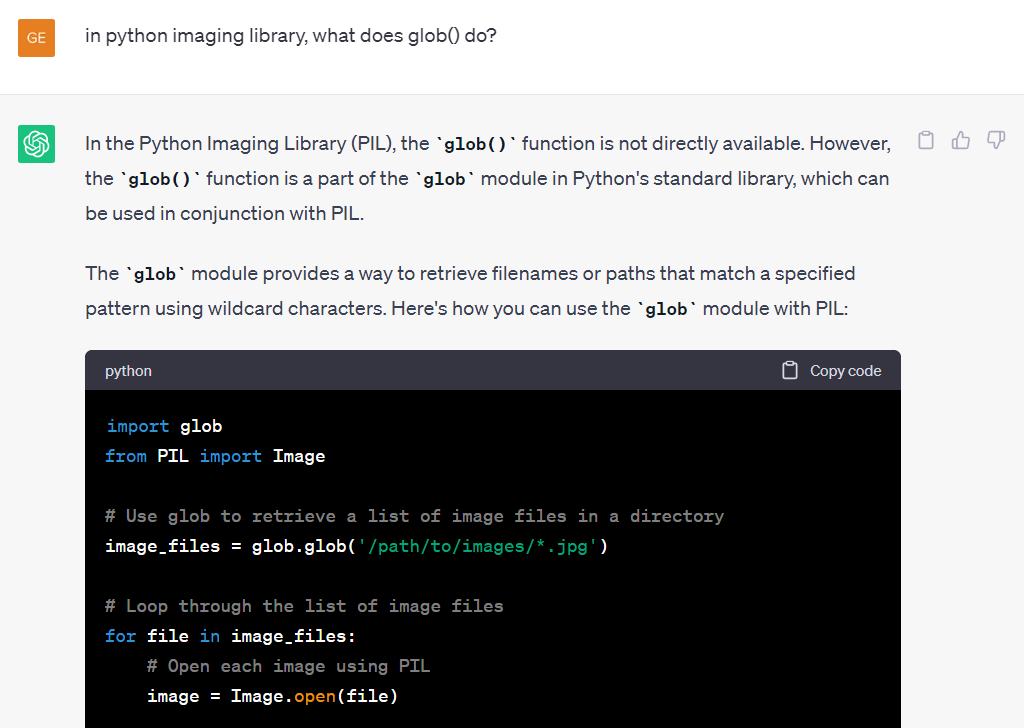

In [5]:
Image("[E-11] images/04.PNG")

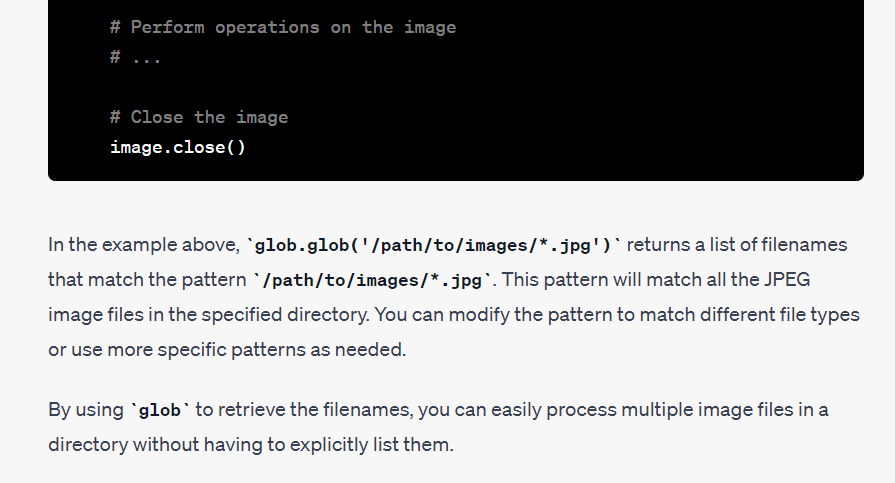

In [6]:
Image("[E-11] images/05.PNG")

### Step 3-2. load_data로 데이터 불러오기 
노드에서 만들어 준 load_data() 함수  

노드의 내용을 정리해보면    
**load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받는다고 한다.**    


그래서 여기에서는 rock_scissor_paper 폴더 위치를 적어준다.    
또한, 숫자 손글씨 mnist는 0~9까지의 숫자를 분류하는 것이므로 10개의 클래스를 만들어주었다면,    
가위바위보의 경우에는 3개의 클래스, **가위: 0, 바위: 1, 보:2**로 라벨링을 해준다.

In [31]:
import numpy as np

def load_data(img_path, number_of_data=1695):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2로 설정
    img_size=28 # 위에서 이미지 size를 28*28로 resize
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32) # 여기에서 np.zeros 함수를 사용한 것 눈여겨 보기

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

# x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
# print("x_train shape: {}".format(x_train_norm.shape))

학습데이터(x_train)의 이미지 개수는 1695 입니다.
x_train shape: (1695, 28, 28, 3)
y_train shape: (1695,)


### **<span style = "color:red;">위 코드에서 number_of_data= Train data의 사진 개수 변경해가며 꼭 써주기!</span>**     
데이터의 개수를 늘려가며 점점 더 더해줄 때 위 load_data 함수 안에서    
**number_of_data=1695**    
숫자 꼭! 바꿔주기

처음에는 300으로 되어있었다.    
바꾸지 않으니 06.png 에러가 났다   

07 08 업로드 하기

### **<span style = "color:orange;">np.zeros() 함수란?</span>**     

**numpy.zeros(shape, dtype=float, order='C', *, like=None)** 

Return a new array of given shape and type, filled with zeros.    
설정한 shape과 type의 0으로 채워진 array를 만들어 주는 함수     

예: np.zeros(5)    
-> array([0., 0., 0., 0., 0.])

np.zeros((2, 1))    
-> array([[0.],    
             [0.]])
             
[출처: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html]

### **<span style = "color:orange;">왜 x_train_norm = x_train/255.0 에서 입력을 0~1 사이의 값으로 정규화를 해주었을까?</span>**   

노드의 숫자 mnist 예시를 보면, 해당 데이터로도 255로 나누어 숫자 mnist 데이터들을 정규화해준다.    
숫자 손글씨 이미지의 실제 픽셀값은 0~255 사이의 값을 가진다.

#### 28x28로 resize한 가위바위보 데이터의 픽셀값도 0~255의 값을 가지는지 확인해보자

In [32]:
# 노드 인용
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


### **<span style = "color:red;">오호 이것으로써 가위바위보 데이터도 0-255의 값을 가지는 것을 알 수 있다</span>**   

만약 resize하기 전이라면?   
그래도 0-255 범위일까?(추후 더 알아보자)   

노드에서는 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋다고 쓰여있다.

**정규화를 하는 이유?**    
**정규화의 효과**    
정규화는 데이터의 최대값을 1, 최소값을 0으로 두어 모든 데이터가 0~1 사이에 위치하도록 변환하는 것이다.    
정규화는 특성 벡터의 길이는 상관없고, 데이터의 방향만이 중요할 때 많이 사용한다.    
대표적으로 scikit-learn에서 MinMaxScaler가 있다.    


그래서    
가위바위보 데이터도 숫자 mnist 데이터처럼 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나누어준다.    
그래서 255로 나누어 주는 것!   
 
이렇게 255로 나누어주면   
최소값이 0, 최대값이 1에 근접하도록 나온다.   

진짜 그렇게 나오는지 확인해보려면      

In [33]:
# 아까 load_data() 함수에서 주석처리한 부분
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_norm.shape))

x_train shape: (1695, 28, 28, 3)


In [34]:
# 노드 인용

print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


#### **<span style = "color:red;">이렇게 255로 나누어주면 최소값이 0, 최대값이 1에 근접하도록 나오는 것을 알 수 있다</span>**  

### Step 3-3. 데이터가 잘 불러와졌는지 예시 이미지 데이터 시각화하기  

라벨:  0


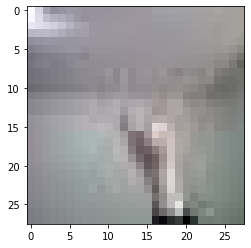

In [35]:
import matplotlib.pyplot as plt

plt.imshow(x_train[100])
print('라벨: ', y_train[100])

### Step 4. 딥러닝 네트워크 설계, 컴파일, 훈련시키기(1번째 시도)

In [36]:
# model의 입력/출력부에 특히 유의하기
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

#### **<span style = "color:red;">노드에서 숫자 mnist 딥러닝 모델을 설계할 때와 이번에는 어떤 부분이 다른지?</span>**   

**1. input_shape의 채널수**    
input_shape=(28,28,1) -> input_shape=(28,28,3)    
흑백 -> 칼라이미지    
    
**2. Dense 레이어에서 출력층의 유닛의 수**    
model.add(keras.layers.Dense(10, activation='softmax'))    
model.add(keras.layers.Dense(3, activation='softmax'))    
출력층에서 분류해야하는 클래스의 수 10개(숫자 10개)에서 3개(가위, 바위, 보)로 변경됨    

In [37]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
53/53 [==============================] - 41s 5ms/step - loss: 1.0169 - accuracy: 0.4897
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 0.7553 - accuracy: 0.6885
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7894
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8425
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.8496
Epoch 6/10
53/53 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.8920
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9038
Epoch 8/10
53/53 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 0.9286
Epoch 9/10
53/53 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9451
Epoch 10/10
53/53 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.9599


### Step 5. 모델의 성능 평가하기
5-1. test data resize, 데이터 불러오기    
5-2. model.evaluate()로 성능 평가, test accuracy 측정

### Step 5-1. test data resize
test 데이터의 수: 100개씩, 총 300장

In [38]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/Test_1/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/Test_1/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/Test_1/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [39]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하기!!!
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/Test_1"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력 여기에서도 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_test shape: {}".format(x_test_norm.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
x_test shape: (300, 28, 28, 3)


### Step 5-2. model.evaluate()로 성능 평가, test accuracy 측정

In [40]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.3050 - accuracy: 0.5733
test_loss: 1.3049925565719604
test_accuracy: 0.5733333230018616


### Step 6. model.predict()으로 잘못 추론한 데이터들 확인
어떤 데이터를 잘못 추론했는지 확인해볼 수 있다.   

노드에서는   
model.predict()을 사용하면    
model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다고 한다.    

우리가 만든 모델은 3가지 가위바위보 중 어느 것일지에 대한 확률값을 출력하는 함수이다.    
그래서 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 모델이 추론한 가위/바위/보의 클래스 번호가 되는 것이다.   

In [41]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.68971485 0.01306144 0.29722366]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


#### **<span style = "color:red;">의미</span>**   
노드에서 model.predict() 결과가  [0.68971485 0.01306144 0.29722366] 와 같이 벡터 형태로 나오는 것이 의미하는 것은        
이 벡터는 model이 추론한 결과가 각각 class 0(가위), class 1(바위), class 2(보)일 확률을 의미한다.        

이 경우라면 model이 추론한 결과가 클래스 0일 확률이 제일 높다.    
즉 이 model은 입력한 이미지가 클래스 0(가위?)라는 걸 아주 확신하고 있다는 뜻이다.    

아래의 함수로 확인할 수 있다고 한다.

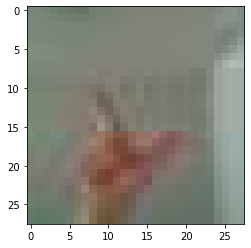

In [42]:
# 노드 인용
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

#### **<span style = "color:red;">오 가위이다!</span>**   
노드에서는 model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인도 가능하다고 한다.

예측확률분포: [0.36420813 0.07336863 0.5624232 ]
라벨: 1, 예측결과: 2


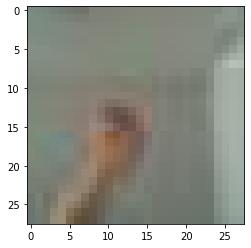

예측확률분포: [0.3490083  0.05234178 0.5986499 ]
라벨: 0, 예측결과: 2


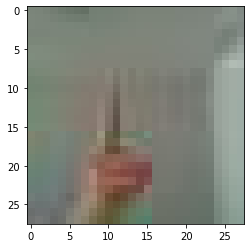

예측확률분포: [0.62754494 0.04540345 0.32705152]
라벨: 1, 예측결과: 0


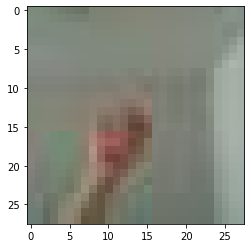

예측확률분포: [0.37031755 0.0296469  0.6000356 ]
라벨: 1, 예측결과: 2


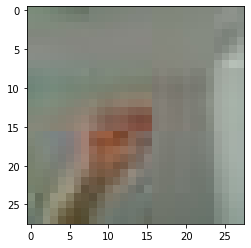

예측확률분포: [0.8072245  0.00957978 0.18319573]
라벨: 1, 예측결과: 0


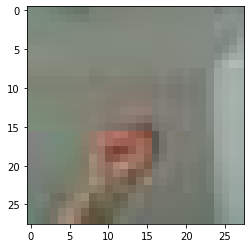

In [43]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [ ]:
노드에서는    
틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있다고 한다.     
그래서 model의 추론 결과를 시각화하여 살펴보는 것은     
향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나라고 한다.

### Step 7. 1번째 시도 결론
10/10 - 0s - loss: 1.3050 - accuracy: 0.5733   
test_loss: 1.3049925565719604   
test_accuracy: 0.5733333230018616   

### Step 8. 정확도를 올리기 위해서, 더 좋은 네트워크를 만들기 위해서 할 수 있는 것!

노드 인용

**하이퍼파라미터들 바꾸기**
1. conv2d 레이어에서 입력 이미지의 특징 수를 늘리거나 줄이거나
2. dense 레이어에서 뉴런수를 바꾸거나
3. 학습 반복횟수인 epoch값 변경하기

**생각해 본 또 해 볼 수 있는 방법들은**   
4. 노드에 있는 데이터를 트레이닝 데이터로 넣어보기     
5. 모델의 유닛수 조절해보기, 드롭아웃 적용해보기    
6. 그루들의 데이터를 더 확보하여 늘리기    
7. 검증데이터로 분류해서 해보기

### Step 9. 2번째 시도_훈련 데이터의 양을 늘리기
train data 6명의 데이터셋 총 865장씩
test data는 다른 그루 1명의 데이터셋 동일하게 유지
모델 구조 동일

In [47]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

865  images to be resized.
865  images resized.
가위 이미지 resize 완료!
865  images to be resized.
865  images resized.
바위 이미지 resize 완료!
865  images to be resized.
865  images resized.
보 이미지 resize 완료!


In [48]:
import numpy as np

def load_data(img_path, number_of_data=2595):  # 가위바위보 이미지 개수 총합에 주의하세요. # 총 600개이므로 바꿈
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_train shape: {}".format(x_train_norm.shape))

학습데이터(x_train)의 이미지 개수는 2595 입니다.
x_train shape: (2595, 28, 28, 3)
y_train shape: (2595,)
x_train shape: (2595, 28, 28, 3)


라벨:  0


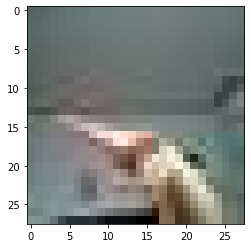

In [49]:
import matplotlib.pyplot as plt

plt.imshow(x_train[800])
print('라벨: ', y_train[800])

In [51]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

#모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 모델 훈련
model.fit(x_train_norm, y_train, epochs=10)


# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (

### Step 10. 2번째 시도 결론

10/10 - 0s - loss: 1.3050 - accuracy: 0.5733    
test_loss: 1.3049925565719604    
test_accuracy: 0.5733333230018616   
    
10/10 - 0s - loss: 1.4044 - accuracy: 0.5033   
test_loss: 1.4044197797775269   
test_accuracy: 0.503333330154419   

1번째 시도보다 loss가 올라가고 정확도가 낮아짐

### Step 11. 3번째 시도_검증데이터 분리
검증데이터 분리    
모델 구조 동일

In [52]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

865  images to be resized.
865  images resized.
가위 이미지 resize 완료!
865  images to be resized.
865  images resized.
바위 이미지 resize 완료!
865  images to be resized.
865  images resized.
보 이미지 resize 완료!


In [53]:
import numpy as np

def load_data(img_path, number_of_data=2595):  # 가위바위보 이미지 개수 총합에 주의하세요. # 총 600개이므로 바꿈
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

In [54]:
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_train shape: {}".format(x_train_norm.shape))

from sklearn.model_selection import train_test_split

x_norm_train, x_norm_val, y_train_2, y_val = train_test_split(x_train_norm, y_train, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

print(x_norm_train.shape, y_train_2.shape)
print(x_norm_val.shape, y_val.shape)

학습데이터(x_train)의 이미지 개수는 2595 입니다.
x_train shape: (2595, 28, 28, 3)
y_train shape: (2595,)
x_train shape: (2595, 28, 28, 3)
(2076, 28, 28, 3) (2076,)
(519, 28, 28, 3) (519,)


### 데이터 개수
x_norm_train 2076개   
검증데이터 519   

In [55]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

#모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 모델 훈련
# model.fit(x_norm_train, y_train_2, epochs=10) 아까는 이렇게 작성했지만 이번에는 이렇게 작성
history = model.fit(x_norm_train, y_train_2, epochs=10, validation_data=(x_norm_val, y_val))

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_9 (Dense)              (

### 시각화

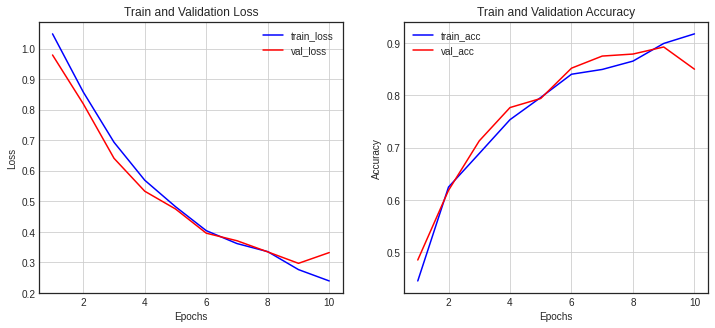

In [57]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 표현하기
# 노드에 있는 코드 인용

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_acc')
ax2.plot(epochs, val_accuracy, 'r-', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### Step 12. 3번째 시도 결론

10/10 - 0s - loss: 1.3050 - accuracy: 0.5733   
test_loss: 1.3049925565719604    
test_accuracy: 0.5733333230018616    
    
10/10 - 0s - loss: 1.4044 - accuracy: 0.5033    
test_loss: 1.4044197797775269   
test_accuracy: 0.503333330154419    
    
10/10 - 0s - loss: 0.8949 - accuracy: 0.5200    
test_loss: 0.8949242234230042   
test_accuracy: 0.5199999809265137    

2번째 시도보다 accuracy가 올라갔지만 처음 데이터양을 늘릴 때보다 정확도가 높지는 않다

### Step 13. 4번째 시도_하이퍼파라미터 조절

In [61]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

865  images to be resized.
865  images resized.
가위 이미지 resize 완료!
865  images to be resized.
865  images resized.
바위 이미지 resize 완료!
865  images to be resized.
865  images resized.
보 이미지 resize 완료!


In [62]:
import numpy as np

def load_data(img_path, number_of_data=2595):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

In [63]:
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_train shape: {}".format(x_train_norm.shape))

from sklearn.model_selection import train_test_split

x_norm_train, x_norm_val, y_train_2, y_val = train_test_split(x_train_norm, y_train, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42)

print(x_norm_train.shape, y_train_2.shape)
print(x_norm_val.shape, y_val.shape)

학습데이터(x_train)의 이미지 개수는 2595 입니다.
x_train shape: (2595, 28, 28, 3)
y_train shape: (2595,)
x_train shape: (2595, 28, 28, 3)
(2076, 28, 28, 3) (2076,)
(519, 28, 28, 3) (519,)


In [ ]:
x_norm_train 2076개
검증데이터 519
이렇게 나눔

In [69]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

#모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_norm_train, y_train_2, epochs=n_train_epoch, validation_data=(x_norm_val, y_val))

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_21 (Dense)             

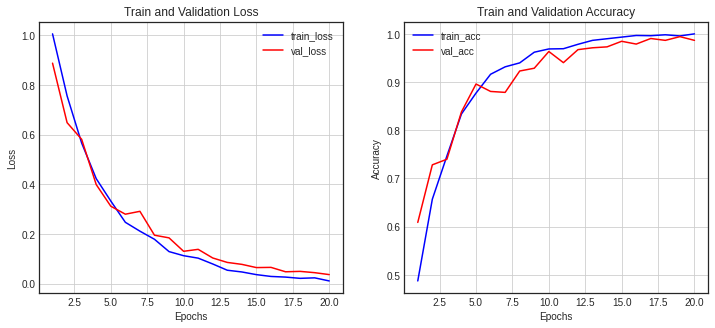

In [70]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_acc')
ax2.plot(epochs, val_accuracy, 'r-', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### Step 14. 4번째 시도 결론

10/10 - 0s - loss: 1.3050 - accuracy: 0.5733    
test_loss: 1.3049925565719604   
test_accuracy: 0.5733333230018616   
    
10/10 - 0s - loss: 1.4044 - accuracy: 0.5033    
test_loss: 1.4044197797775269   
test_accuracy: 0.503333330154419   
    
10/10 - 0s - loss: 0.8949 - accuracy: 0.5200    
test_loss: 0.8949242234230042    
test_accuracy: 0.5199999809265137   
    
10/10 - 0s - loss: 1.8968 - accuracy: 0.6500    
test_loss: 1.8968255519866943   
test_accuracy: 0.6499999761581421   

예에에! 지금까지 정확도 중 제일 높다!

# 2. 결론

1. 총 train data 가위바위보 각 865장씩 사용   
2. test data는 각 100장씩 사용   
3. Acuuracy 60% 이상 달성   

# 3. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    데이터 전처리

- **해결을 위해 시도한 방법**  
    포기하지 않았어요!  


- **문제해결에 성공한 이유 또는 실패한 이유**  
    노드 앞 내용들을 복습하며 시간을 많이 들였어요.

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**  
파이썬 코드들에 대해서 새로 알게 된 부분들이 많았어요.    

- **아직 모호한 점**    
이미지 데이터 불러오는 것과 관련해서 에러가 났었는데 그 부분이 아직 모호해요.    

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

1. 끝까지 마무리하여 기뻐요!    
2. 회고에 시간을 많이 투자하지 못해 아쉬워요.   
3. 재미있게 진행한 프로젝트에요.      
4. 노드에서 제공한 테스트데이터로 테스트 해보고 싶었는데 못했어요. 다음에!    
5. 쥬피터노트북에서 이미지들을 한꺼번에 로컬로 다운로드 받는 방법을 알고 싶어요.

# 4. References

위키백과_PIL
https://ko.wikipedia.org/wiki/Python_Imaging_Library

np.zeros
https://numpy.org/doc/stable/reference/generated/numpy.zeros.html